# Decorators
**Decorators** modify function without changing their original code. Decorators take a function as an input. They are noted by @ in python. 

Let's write a very simple decorator that prints something before the function is executed

In [6]:
def greet_func(func):
    def wrapper():
        print("hello")
        func()
        print('this is the first decorator')
    return wrapper 

@greet_func
def say_hello():
    print("hi")

say_hello()

hello
hi
this is the first decorator


Let's write something a bit more complicated, the following will plot a function

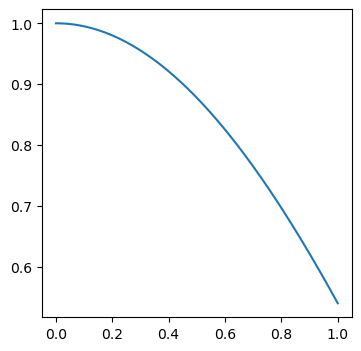

In [17]:
import numpy as np

def decorator(func):
    def wrapper():
        x, y = func()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize = (4,4))
        ax.plot(x, y)
        return (x, y)
    return wrapper

@decorator
def plot_function():
    x = np.linspace(0,1,100)
    y = np.cos(x)
    return x, y

plot_function()

(array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
 array([ 0.        ,  0.20266794,  0.39692415,  0.57470604,  0.72863478,
         0.85232157,  0.94063279,  0.98990308,  0.99808748,  0.96484631,
         0.89155923,  0.78126802,  0.63855032,  0.46932961,  0.2806294 ,
         0.08028167, -0.12339814, -0.32195632, -0

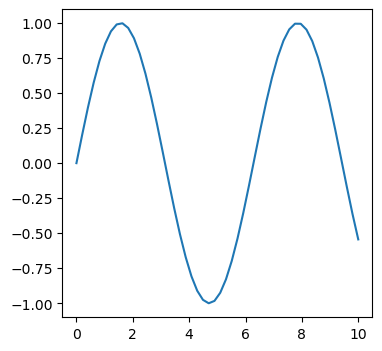

In [4]:
import numpy as np

# note that the decorator itself gets function as an argument
def make_plot(func):
    #arguments to the function are actually passed to wrapper
    def wrapper(*args):
        import matplotlib.pyplot as plt
        x, y = func(*args)
        fig, ax = plt.subplots(figsize = (4,4))
        ax.plot(x,y)       
        return (x,y)
    return wrapper 

@make_plot
def plot_func(xmax):
    x = np.linspace(0, xmax)
    y = np.sin(x)
    return x, y

plot_func(10)
    

### Exercise 1: Create a Basic Decorator
Write a decorator called greet_decorator that prints "Welcome!" before executing the original function.

In [24]:
def say_welcome(func):
    def wrapper(*args):
        print("Welcome!")
        print('function was called with argument', *args)
        func(*args)
    return wrapper

@say_welcome
def do_something(n):
    print('something')
    
do_something(10)

Welcome!
function was called with argument 10
something


### Exercise 2: Add Logging to a Function
Create a decorator called log_decorator that logs the function name and its arguments every time the function is called.

In [5]:
def func_logger(func):
    def wrapper(*args):
        import logging
        logger = logging.getLogger(__name__)
        logging.basicConfig(filename = 'mylog.log', level = logging.INFO)
        logger.info('started')
        logger.info('called function ')
        logger.info( func.__name__)
        logger.info('with args = ', )
        logger.info([arg for arg in args])
        result = func(*args)
        #do not forget to return the result of the original function
        return result
    return wrapper
    
@func_logger
def add_numbers(a,b):
    return a + b

print(add_numbers(0, 10))

10


### Exercise 3: Count Function Calls
Write a decorator called count_calls that counts the number of times a function is called and prints it.

In [16]:
nprev = 0
def count_calls(func):
    def wrapper(*args):
        global nprev
        nprev = nprev + 1
        print(f'function {func.__name__} is called {nprev} time(s)')
        result = func(*args)
        return result
    return wrapper
        
@count_calls    
def say_hello():
    print('hello')
    return 
    
say_hello()
say_hello()
say_hello()

function say_hello is called 1 time(s)
hello
function say_hello is called 2 time(s)
hello
function say_hello is called 3 time(s)
hello


### Exercise 4: Create a Timer Decorator
Create a decorator called time_it that measures and prints the time taken to execute a function.

In [12]:
def time_it(func):
    def wrapper(*args):
        from datetime import datetime
        tstart = datetime.now()
        result = func(*args)
        tend = datetime.now()
        diff = tend - tstart
        diff_in_seconds = diff.days*24*3600 + diff.seconds
        print(f'it took {diff_in_seconds} seconds to execute the function')
        return result
    return wrapper

@time_it
def count(n):
    for i in range(n):
        pass
    return 

count(100000000)

it took 2 seconds to execute the function
